# FLIGHT DELAY
### About Dataset

Flight Delay and Causes dataset contains flight information, including schedules, departure and arrival times, airline and aircraft information, as well as data on delays and reasons for delays.

## RESEARCH OBJECTIVES AND HYPOTHESES

#### Objectives of the analysis:

1. Identify the most common reasons for flight delays: The goal is to identify what are the most common reasons for flight delays (eg weather conditions, aircraft problems, national air system, security reasons) and their impact on the total flight delay.
2. Investigate the impact of different airlines on delays: The goal is to analyze the differences in flight delays between different airlines and identify which airlines have the best (and worst) results in terms of flight punctuality.
3. To study the impact of distance between airports on delays: The aim is to investigate whether there is a relationship between the distance between departure and arrival airports and the probability of flight delays.
4. Route Analysis: Investigating whether there is any relationship between the route and the delay.


#### Hypotheses:

- Hypothesis 1: Flight delays caused by weather conditions: I expect that flight delays will occur more often due to bad weather conditions such as storms, snow or fog.
- Hypothesis 2: Airlines with a higher number of flights have a higher probability of delays: I predict that airlines operating a higher number of flights will have a higher probability of delays due to increased exposure to operational difficulties.
- Hypothesis 3: Delays due to the national air system (NAS): I predict that delays caused by problems in the national air system will be more frequent during times of heavy passenger traffic or in areas with heavy air traffic.
- Hypothesis 4: There is a statistically significant difference in average delay between routes passing through high-congestion airports and routes passing through low-congestion airports.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

df = pd.read_csv('Flight_delay.csv')


In [2]:
# Review the first 5 rows
print(df.head())

   DayOfWeek        Date  DepTime  ArrTime  CRSArrTime UniqueCarrier  \
0          4  03-01-2019     1829     1959        1925            WN   
1          4  03-01-2019     1937     2037        1940            WN   
2          4  03-01-2019     1644     1845        1725            WN   
3          4  03-01-2019     1452     1640        1625            WN   
4          4  03-01-2019     1323     1526        1510            WN   

                  Airline  FlightNum TailNum  ActualElapsedTime  ...  TaxiIn  \
0  Southwest Airlines Co.       3920  N464WN                 90  ...       3   
1  Southwest Airlines Co.        509  N763SW                240  ...       3   
2  Southwest Airlines Co.       1333  N334SW                121  ...       6   
3  Southwest Airlines Co.        675  N286WN                228  ...       7   
4  Southwest Airlines Co.          4  N674AA                123  ...       4   

   TaxiOut  Cancelled  CancellationCode Diverted CarrierDelay WeatherDelay  \
0       

In [3]:
# Information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484551 entries, 0 to 484550
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DayOfWeek          484551 non-null  int64 
 1   Date               484551 non-null  object
 2   DepTime            484551 non-null  int64 
 3   ArrTime            484551 non-null  int64 
 4   CRSArrTime         484551 non-null  int64 
 5   UniqueCarrier      484551 non-null  object
 6   Airline            484551 non-null  object
 7   FlightNum          484551 non-null  int64 
 8   TailNum            484551 non-null  object
 9   ActualElapsedTime  484551 non-null  int64 
 10  CRSElapsedTime     484551 non-null  int64 
 11  AirTime            484551 non-null  int64 
 12  ArrDelay           484551 non-null  int64 
 13  DepDelay           484551 non-null  int64 
 14  Origin             484551 non-null  object
 15  Org_Airport        483374 non-null  object
 16  Dest               4

In [4]:
# Check for missing values
print(df.isnull().sum())

DayOfWeek               0
Date                    0
DepTime                 0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
Airline                 0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Org_Airport          1177
Dest                    0
Dest_Airport         1479
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64


In [5]:
# Deleting rows that contain missing values as the size of the dataset allows
df_cleaned = df.dropna()

In [6]:
# Check if missing values are removed
print(df_cleaned.isnull().sum())

DayOfWeek            0
Date                 0
DepTime              0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
Airline              0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Org_Airport          0
Dest                 0
Dest_Airport         0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [7]:
# Conversion of 'Date' column to date format
df_cleaned.loc[:, 'Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%m-%Y')

# Checking the new format of the 'Date' column
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 481895 entries, 0 to 484550
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DayOfWeek          481895 non-null  int64 
 1   Date               481895 non-null  object
 2   DepTime            481895 non-null  int64 
 3   ArrTime            481895 non-null  int64 
 4   CRSArrTime         481895 non-null  int64 
 5   UniqueCarrier      481895 non-null  object
 6   Airline            481895 non-null  object
 7   FlightNum          481895 non-null  int64 
 8   TailNum            481895 non-null  object
 9   ActualElapsedTime  481895 non-null  int64 
 10  CRSElapsedTime     481895 non-null  int64 
 11  AirTime            481895 non-null  int64 
 12  ArrDelay           481895 non-null  int64 
 13  DepDelay           481895 non-null  int64 
 14  Origin             481895 non-null  object
 15  Org_Airport        481895 non-null  object
 16  Dest               481895

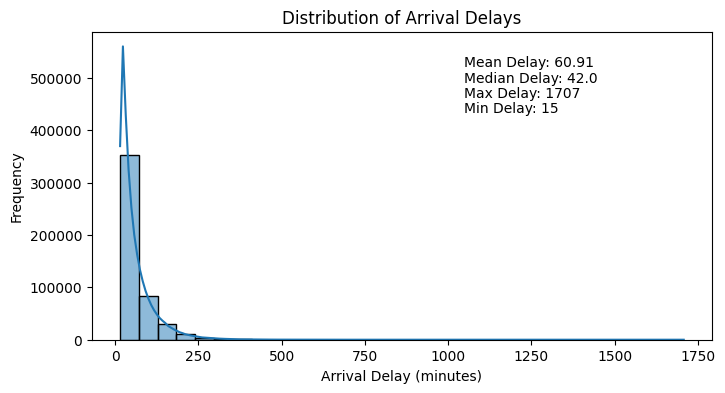

In [8]:
# Analysis of the distribution of variables

# Histogram for variable 'ArrDelay'
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='ArrDelay', bins=30, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')

# Calculating summary statistics
mean_delay = df['ArrDelay'].mean()
median_delay = df['ArrDelay'].median()
max_delay = df['ArrDelay'].max()
min_delay = df['ArrDelay'].min()

# Adding text with summary statistics
plt.text(0.6, 0.9, f'Mean Delay: {mean_delay:.2f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.85, f'Median Delay: {median_delay}', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.8, f'Max Delay: {max_delay}', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.75, f'Min Delay: {min_delay}', ha='left', va='center', transform=plt.gca().transAxes)

plt.show()


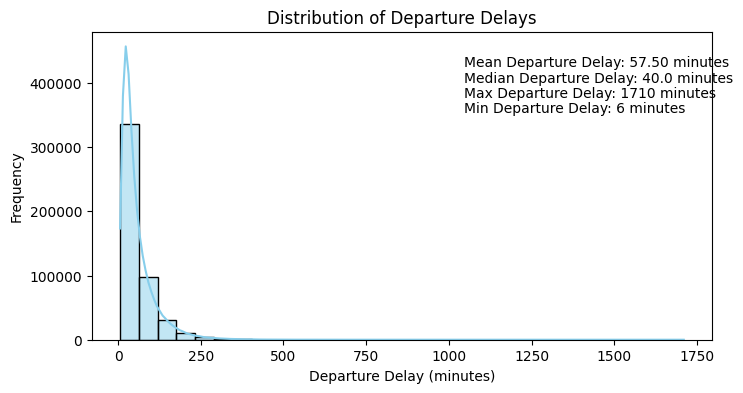

In [9]:
# Histogram for variable 'DepDelay'
plt.figure(figsize=(8, 4))
sns.histplot(df['DepDelay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')

# Summary statistics for Departure Delays
mean_dep_delay = df['DepDelay'].mean()
median_dep_delay = df['DepDelay'].median()
max_dep_delay = df['DepDelay'].max()
min_dep_delay = df['DepDelay'].min()

# Adding text with summary statistics
plt.text(0.6, 0.9, f'Mean Departure Delay: {mean_dep_delay:.2f} minutes', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.85, f'Median Departure Delay: {median_dep_delay} minutes', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.8, f'Max Departure Delay: {max_dep_delay} minutes', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.75, f'Min Departure Delay: {min_dep_delay} minutes', ha='left', va='center', transform=plt.gca().transAxes)

plt.show()


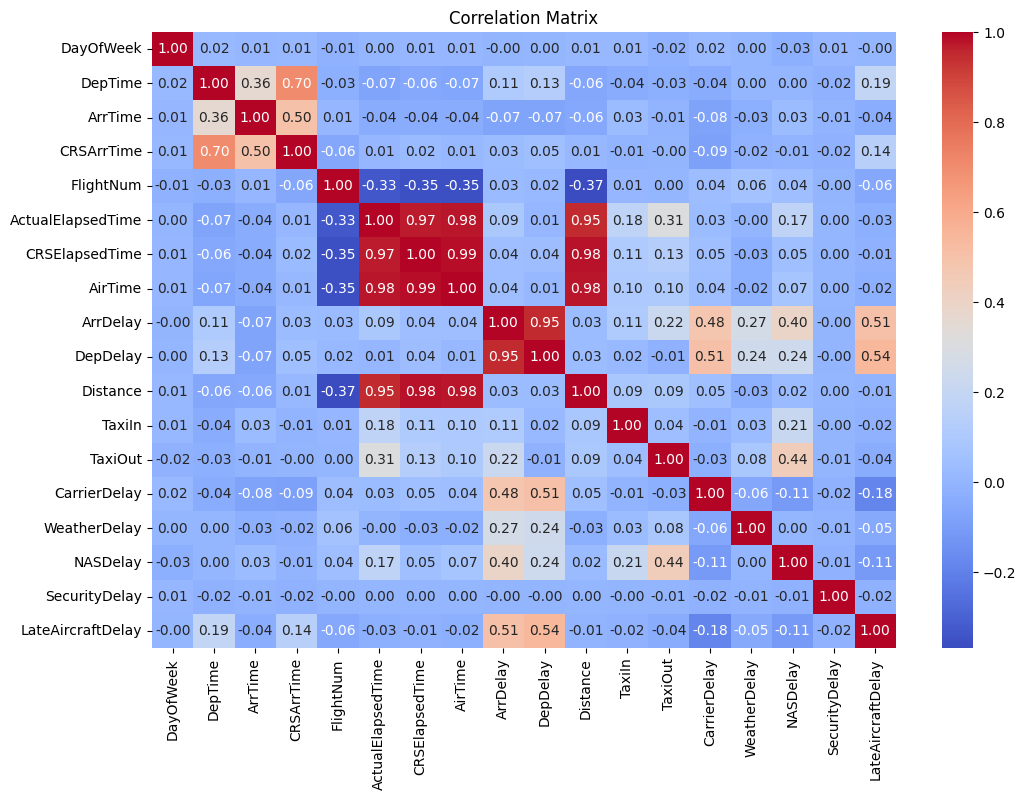

Summary Statistics for Correlation Matrix:
Maximum correlation: 1.0
Minimum correlation: -0.3695662888327006
Mean correlation: 0.13046177886629873


In [10]:
# Dropping the variables "Cancelled" and "Diverted" from the dataset because they have no importance, all rows of these two variables are the value '0'
df = df.drop(['Cancelled', 'Diverted'], axis=1)

# Extracting numeric variables
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_columns]

# Visualization of correlations between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Summary statistics for correlation matrix
correlation_matrix = numeric_df.corr()
max_corr = correlation_matrix.values.max()
min_corr = correlation_matrix.values.min()
mean_corr = correlation_matrix.values.mean()

print("Summary Statistics for Correlation Matrix:")
print("Maximum correlation:", max_corr)
print("Minimum correlation:", min_corr)
print("Mean correlation:", mean_corr)


## OBJECTIVE 1 (HYPOTHESIS 1)

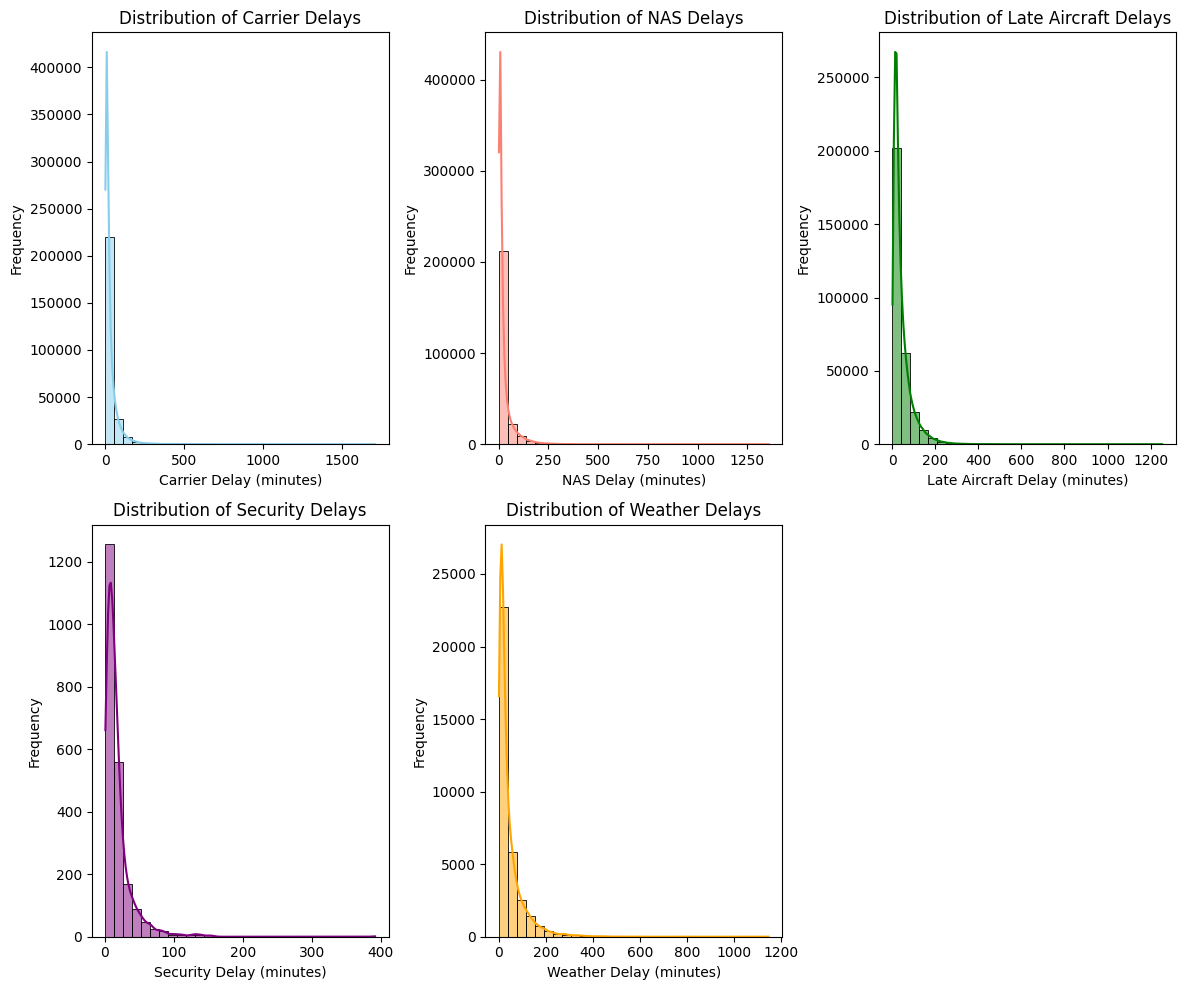

T-test results for Carrier Delay:
  - Mean Carrier Delay: 32.65
  - Mean No Carrier Delay: 66.30
  - T-statistic: -220.56, p-value: 0.0000


In [11]:
# Identification of all reasons for flight delays
carrier_delays = df[df['CarrierDelay'] > 0]
nas_delays = df[df['NASDelay'] > 0]
late_aircraft_delays = df[df['LateAircraftDelay'] > 0]
security_delays = df[df['SecurityDelay'] > 0]
weather_delays = df[df['WeatherDelay'] > 0] # HYPOTHESIS 1: I expect flight delays to occur more often due to bad weather conditions such as storms, snow or fog.

# Visualization and analysis of the reasons for the delay
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
sns.histplot(carrier_delays['CarrierDelay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Carrier Delays')
plt.xlabel('Carrier Delay (minutes)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.histplot(nas_delays['NASDelay'], bins=30, kde=True, color='salmon')
plt.title('Distribution of NAS Delays')
plt.xlabel('NAS Delay (minutes)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(late_aircraft_delays['LateAircraftDelay'], bins=30, kde=True, color='green')
plt.title('Distribution of Late Aircraft Delays')
plt.xlabel('Late Aircraft Delay (minutes)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(security_delays['SecurityDelay'], bins=30, kde=True, color='purple')
plt.title('Distribution of Security Delays')
plt.xlabel('Security Delay (minutes)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(weather_delays['WeatherDelay'], bins=30, kde=True, color='orange') # Dodatak za prikaz vremenskih kašnjenja
plt.title('Distribution of Weather Delays')
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# TESTING
# For each identified reason for the delay, we conduct appropriate statistical tests

# Test for CarrierDelay:
from scipy.stats import ttest_ind

carrier_delay_means = carrier_delays['CarrierDelay'].mean()
no_carrier_delay_means = df[df['CarrierDelay'] == 0]['ArrDelay'].mean()

t_stat, p_value = ttest_ind(carrier_delays['CarrierDelay'], df[df['CarrierDelay'] == 0]['ArrDelay'])
print(f"T-test results for Carrier Delay:")
print(f"  - Mean Carrier Delay: {carrier_delay_means:.2f}")
print(f"  - Mean No Carrier Delay: {no_carrier_delay_means:.2f}")
print(f"  - T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")


In [12]:
# Test for WeatherDelay:
import scipy.stats as stats

weather_delay = df[df['WeatherDelay'] > 0]['ArrDelay']
no_weather_delay = df[df['WeatherDelay'] == 0]['ArrDelay']

t_stat, p_value = stats.ttest_ind(weather_delay, no_weather_delay)
print("T-test results for Weather Delay:")
print("- Mean Weather Delay:", weather_delay.mean())
print("- Mean No Weather Delay:", no_weather_delay.mean())
print("- T-statistic:", t_stat, ", p-value:", p_value)

# Test for NASDelay:
nas_delay = df[df['NASDelay'] > 0]['ArrDelay']
no_nas_delay = df[df['NASDelay'] == 0]['ArrDelay']

t_stat, p_value = stats.ttest_ind(nas_delay, no_nas_delay)
print("T-test results for NAS Delay:")
print("- Mean NAS Delay:", nas_delay.mean())
print("- Mean No NAS Delay:", no_nas_delay.mean())
print("- T-statistic:", t_stat, ", p-value:", p_value)

# Test for SecurityDelay:
security_delay = df[df['SecurityDelay'] > 0]['ArrDelay']
no_security_delay = df[df['SecurityDelay'] == 0]['ArrDelay']

t_stat, p_value = stats.ttest_ind(security_delay, no_security_delay)
print("T-test results for Security Delay:")
print("- Mean Security Delay:", security_delay.mean())
print("- Mean No Security Delay:", no_security_delay.mean())
print("- T-statistic:", t_stat, ", p-value:", p_value)

# Test for LateAircraftDelay:
late_aircraft_delay = df[df['LateAircraftDelay'] > 0]['ArrDelay']
no_late_aircraft_delay = df[df['LateAircraftDelay'] == 0]['ArrDelay']

t_stat, p_value = stats.ttest_ind(late_aircraft_delay, no_late_aircraft_delay)
print("T-test results for Late Aircraft Delay:")
print("- Mean Late Aircraft Delay:", late_aircraft_delay.mean())
print("- Mean No Late Aircraft Delay:", no_late_aircraft_delay.mean())
print("- T-statistic:", t_stat, ", p-value:", p_value)



T-test results for Weather Delay:
- Mean Weather Delay: 85.91998950682057
- Mean No Weather Delay: 59.00186121716495
- T-statistic: 84.98079711704138 , p-value: 0.0
T-test results for NAS Delay:
- Mean NAS Delay: 65.08585162915674
- Mean No NAS Delay: 56.437261837630935
- T-statistic: 52.95436097364422 , p-value: 0.0
T-test results for Security Delay:
- Mean Security Delay: 39.89689781021898
- Mean No Security Delay: 61.0032444714414
- T-statistic: -17.309919113766323 , p-value: 4.1486429899341214e-67
T-test results for Late Aircraft Delay:
- Mean Late Aircraft Delay: 61.01393269548004
- Mean No Late Aircraft Delay: 60.730417578299374
- T-statistic: 1.6764569202307824 , p-value: 0.09364937278842779


## OBJECTIVE 2 (HYPOTHESIS 2)

In [13]:
# Analysis of the distribution of delays by airline: how the delays are distributed among different airlines.
# Grouping data by airline, plus mean (calculation of average delay)
carrier_mean_delays = df.groupby('UniqueCarrier')['ArrDelay'].mean()

print("Average delays by airline:")
print(carrier_mean_delays)

# Finding the airline with the longest average delay
max_delay_carrier = carrier_mean_delays.idxmax()
max_delay = carrier_mean_delays.max()
print(f"\nThe most delayed airline: {max_delay_carrier} with an average delay of {max_delay:.2f} minutes.")




Average delays by airline:
UniqueCarrier
AA    65.729621
AS    57.557600
B6    72.869370
DL    59.292422
EV    63.210684
F9    41.973710
HA    55.658333
MQ    64.277233
OO    65.187659
UA    69.670539
US    58.454165
WN    51.032945
Name: ArrDelay, dtype: float64

The most delayed airline: B6 with an average delay of 72.87 minutes.


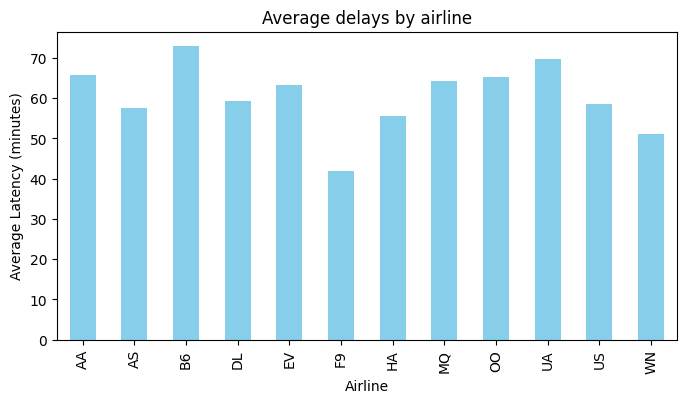

In [14]:
# Visualization of results:
plt.figure(figsize=(8, 4))
carrier_mean_delays.plot(kind='bar', color='skyblue')

plt.title('Average delays by airline')
plt.xlabel('Airline')
plt.ylabel('Average Latency (minutes)')
plt.show()


In [15]:
#Statistical analysis of differences in delays (ANOVA test): Checking if there are significant differences in average delays between different airlines.
from scipy.stats import f_oneway
carriers = df['UniqueCarrier'].unique()

data = [df[df['UniqueCarrier'] == carrier]['ArrDelay'] for carrier in carriers]

f_statistic, p_value = f_oneway(*data)

print("ANOVA results:")
print("F-statistics:", f_statistic)
print("P-value:", p_value)



ANOVA results:
F-statistics: 719.2035589951731
P-value: 0.0


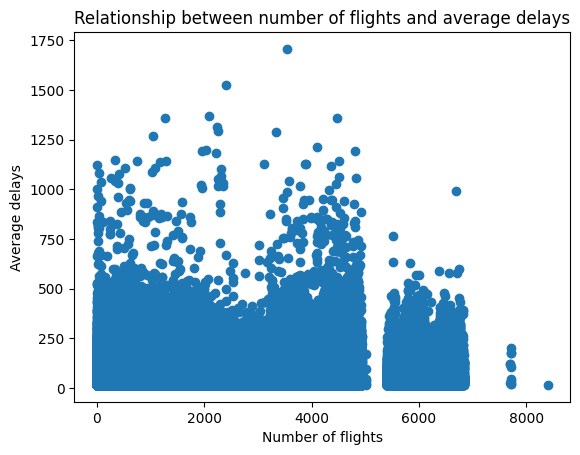

Pearson correlation: 0.025788664676664252


In [16]:
# Investigating the relationship between the number of flights and delays: Is there a relationship between the number of flights operated by an airline and the average delays it records.
# Pearson correlation:
correlation = df['FlightNum'].corr(df['ArrDelay'])

# Visualization of the connection
plt.scatter(df['FlightNum'], df['ArrDelay'])
plt.title('Relationship between number of flights and average delays')
plt.xlabel('Number of flights')
plt.ylabel('Average delays')
plt.show()

print(f"Pearson correlation: {correlation}")


## OBJECTIVE 3 (HYPOTHESIS 3)

In [17]:
#First we will calculate the distance between the departure and arrival airports for each flight:

df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce') 
departure_arrival_distance = df.groupby(['Origin', 'Dest'])['Distance'].mean().reset_index()

print(departure_arrival_distance.head())


  Origin Dest  Distance
0    ABE  ATL     692.0
1    ABE  CLT     481.0
2    ABE  CVG     503.0
3    ABE  ORD     654.0
4    ABI  DFW     158.0


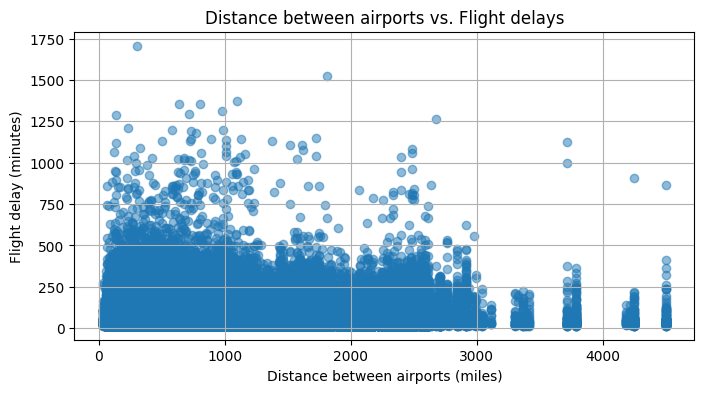

In [18]:
#We use a scatter plot to visualize the relationship between the distance between airports and flight delays

plt.figure(figsize=(8, 4))
plt.scatter(df['Distance'], df['ArrDelay'], alpha=0.5)
plt.title('Distance between airports vs. Flight delays')
plt.xlabel('Distance between airports (miles)')
plt.ylabel('Flight delay (minutes)')
plt.grid(True)
plt.show()



In [19]:
#statistical analysis to check if there is a significant relationship between distance between airports and flight delays
# Calculation of Pearson's correlation
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['Distance'], df['ArrDelay'])
print(f"Pearson correlation: {correlation}")
print(f"P-value: {p_value}")


Pearson correlation: 0.027743740707961186
P-value: 3.9401105785071016e-83


In [20]:
#Testing Hypothesis 3:
# Extraction of relevant variables and delays caused by NAS
relevant_columns = ['NASDelay', 'DepDelay', 'ArrDelay', 'Distance', 'AirTime']  
nas_delay_data = df[relevant_columns]

# Calculation of Pearson's correlation
correlation = nas_delay_data.corr()

print("Pearson's correlation:")
print(correlation)

Pearson's correlation:
          NASDelay  DepDelay  ArrDelay  Distance   AirTime
NASDelay  1.000000  0.235891  0.395434  0.023654  0.069138
DepDelay  0.235891  1.000000  0.948856  0.027307  0.011101
ArrDelay  0.395434  0.948856  1.000000  0.027744  0.039962
Distance  0.023654  0.027307  0.027744  1.000000  0.977436
AirTime   0.069138  0.011101  0.039962  0.977436  1.000000


## OBJECTIVE 4 (HYPOTHESIS 4)

In [21]:
# Creating a new 'Route' column that combines origin and destination
df['Route'] = df['Origin'] + '-' + df['Dest']

# Identification of routes
unique_routes = df['Route'].unique()

print("Unique routes:")
for i, route in enumerate(unique_routes):
    if i < 5 or i >= len(unique_routes) - 5:
        print(route)

Unique routes:
IND-BWI
IND-LAS
IND-MCO
IND-PHX
IND-TPA
BUF-DFW
MIA-JAX
JAX-MIA
LGA-TVC
TVC-LGA


In [22]:
# Create an empty DataFrame to store average delays across routes
average_delays = pd.DataFrame(columns=['Route', 'Average_Delay'])

for route in unique_routes:
    route_data = df[df['Route'] == route]
    average_delay = route_data['ArrDelay'].mean()
    average_delays.loc[len(average_delays)] = [route, average_delay]

# Printing average delays by routes
print("Average delays by route:")
print(average_delays)


Average delays by route:
        Route  Average_Delay
0     IND-BWI      41.924051
1     IND-LAS      54.425743
2     IND-MCO      50.673469
3     IND-PHX      45.122642
4     IND-TPA      46.125000
...       ...            ...
3372  BUF-DFW     186.714286
3373  MIA-JAX      59.900000
3374  JAX-MIA      82.133333
3375  LGA-TVC      17.000000
3376  TVC-LGA      42.000000

[3377 rows x 2 columns]


In [23]:
# Threshold number of flights for high-traffic airports:
high_traffic_threshold = 100

# Calculation of the number of flights for each route based on data on departures and destinations (to detect high and low congestion airports)
flight_counts = df.groupby('Route').size().reset_index(name='Number_of_Flights')

# Merging the number of flights with average delays by route
average_delays = average_delays.merge(flight_counts, on='Route', how='left')

# Separation of average delays into routes passing through high and low congestion airports
high_traffic = average_delays[average_delays['Number_of_Flights'] > high_traffic_threshold]
low_traffic = average_delays[average_delays['Number_of_Flights'] <= high_traffic_threshold]

# t-test for average delays:
t_statistic, p_value = ttest_ind(high_traffic['Average_Delay'], low_traffic['Average_Delay'])

print("T-statistics:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a statistically significant difference in average delay between routes passing through high and low congestion airports.")
else:
    print("There is no statistically significant difference in average delay between routes passing through high and low congestion airports.")


T-statistics: -1.4346823502801627
P-value: 0.15147028851060226
There is no statistically significant difference in average delay between routes passing through high and low congestion airports.


# CONCLUSION

## OBJECTIVE 1 (HYPOTHESIS 1)

- Objective 1: Identify the most common reasons for flight delays: The goal is to identify what are the most common reasons for flight delays (eg weather conditions, aircraft problems, national air system, security reasons) and their impact on the total flight delay.
- Hypothesis 1: Flight delays caused by weather conditions: I expect that flight delays will occur more often due to bad weather conditions such as storms, snow or fog.

Analysis of flight delay data provided insight into the causes affecting flight delays and confirmed some expected trends.  When it comes to the causes of delays, statistically significant differences were observed in delays caused by carriers,  weather conditions, delays caused by the National Aviation System (NAS), and delays due to security reasons.
The highest average delays were recorded for weather delays, which was expected given the unpredictability of weather conditions. Although the average delays caused by the late arrival of aircraft (Late Aircraft Delay) did not show a statistically significant difference compared to situations when this cause was not present, it is important to point out that this is the most common reason for flight delays.
Data analysis supports the hypothesis that bad weather is a common cause of flight delays, as confirmed by a statistically significant difference in average delays between weather-related and non-weather-related flights. Also, a greater tendency of extreme delays was observed in cases of bad weather conditions.


## OBJECTIVE 2 (HYPOTHESIS 2)

- Objective 2: Investigate the impact of different airlines on delays: The goal is to analyze the differences in flight delays between different airlines and identify which airlines have the best (and worst) results in terms of flight punctuality.
- Hypothesis 2: Airlines with a higher number of flights have a higher probability of delays: I predict that airlines operating a higher number of flights will have a higher probability of delays due to increased exposure to operational difficulties.

The ANOVA test results indicate statistically significant differences in average delays among airlines, 
implying that at least one airline has a delay that is significantly different from the others. 
However, the Pearson correlation between the number of flights and average delays shows a very weak linear association between these 
variables, suggesting that the number of flights does not significantly affect average flight delays.
Although it was hypothesized that airlines with more flights might have a higher chance of delays due to increased 
exposure to operational difficulties, the analysis did not support this hypothesis. This suggests that factors such as 
operational efficiency or delay handling may have a greater impact on average flight delays than the sheer number of flights operated by an airline.

## OBJECTIVE 3 (HYPOTHESIS 3)

- Objectives 3: To study the impact of distance between airports on delays: The aim is to investigate whether there is a relationship between the distance between departure and arrival airports and the probability of flight delays.
- Hypothesis 3: Delays due to the national air system (NAS): I predict that delays caused by problems in the national air system will be more frequent during times of heavy passenger traffic or in areas with heavy air traffic.

The Pearson correlation between distance between airports and flight delays shows a very weak positive 
association (approximately 0.028), but statistically significant. This indicates that the distance between 
airports has very little effect on flight delays. Although there is some association, it is very weak, 
implying that distance between airports is not a major factor affecting flight delays.
##### Answer to the hypothesis:
Pearson correlation results between the variables and delays caused by the national air system (NAS) show weak positive 
correlations, with NASDelay having a weak positive correlation with departure (DepDelay) and arrival (ArrDelay) delays. 
Distance between airports and flight time have very little association with NAS-induced delays, while arrival and departure 
delay have a slightly stronger association, but still not very high. These results suggest that there is some relationship 
between the variables and delays caused by the national air system, but it is not very strong.

## OBJECTIVE 4 (HYPOTHESIS 4)

- Objective 4: Route Analysis: Investigating whether there is any relationship between the route and the delay.
- Hypothesis 4: There is a statistically significant difference in average delay between routes passing through high-congestion airports and routes passing through low-congestion airports.

The t-test results indicate that there is no statistically significant difference in the average delay between routes passing 
through high and low congestion airports. This implies that, according to the available data and the chosen level of significance, 
we cannot conclude that there is a difference in the average delay between these two groups of routes. This suggests that airport 
congestion, at least considering the number of flights as a criterion, may not be the key factor influencing the average flight delay 
on those routes. However, it is important to consider other factors such as weather conditions, operational problems and technical 
problems with the aircraft.
##### Answer to the hypothesis:
Our analysis found no statistically significant difference in average delay between routes passing through high-congestion airports and 
routes passing through low-congestion airports.


                                                                                         
                                                                                         

# MODEL CREATION

Reducing the number of records

In [24]:
print(f"Original number of records: {len(df)}")

# Randomize 30,000 records and overwrite the original DataFrame
df = df.sample(n=30000, random_state=42)

print(f"Number of records in the reduced dataset: {len(df)}")

print(df.head())

Original number of records: 484551
Number of records in the reduced dataset: 30000
        DayOfWeek        Date  DepTime  ArrTime  CRSArrTime UniqueCarrier  \
9098            5  18-01-2019     2149     2304        2235            WN   
52651           1  21-01-2019      835      957         905            EV   
185971          5  14-03-2019     2136     2314        2230            WN   
37599           4  10-01-2019     1932     2109        2010            UA   
238854          1  17-03-2019     1447     1632        1615            MQ   

                             Airline  FlightNum TailNum  ActualElapsedTime  \
9098          Southwest Airlines Co.       3332  N345SA                 75   
52651    Atlantic Southeast Airlines       4450  N851AS                 82   
185971        Southwest Airlines Co.       1071  N506SW                 98   
37599          United Air Lines Inc.       1219  N818UA                157   
238854  American Eagle Airlines Inc.       3861  N823AE         

# 1. CLASSIFICATION

1.Classification: Delay Type Prediction - We use classification algorithms to predict which type of delay (Carrier, Weather, NAS, Security, Late Aircraft) will be the most likely cause of flight delays.

- Models: XGBClassifier
- Target variable: Delay type (CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay)
- Input variables: Date, DepTime, ArrTime, UniqueCarrier, Origin, Dest, Distance, etc.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Creating a target variable: The largest delay becomes the delay type
def delay_type(row):
    delays = row[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
    if delays.max() > 0:
        return delays.idxmax()
    else:
        return 'NoDelay'

df['DelayType'] = df.apply(delay_type, axis=1)

# Filtering relevant columns
features = ['DayOfWeek', 'DepTime', 'CRSArrTime', 'UniqueCarrier', 'Origin', 'Dest', 'Distance']
X = df[features]
y = df['DelayType']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identification of categorical and numeric columns
categorical_cols = ['UniqueCarrier', 'Origin', 'Dest']
numerical_cols = ['DayOfWeek', 'DepTime', 'CRSArrTime', 'Distance']

# Creating a ColumnTransformer to transform the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Data transformation before applying SMOTE
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Label encoding for the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train_encoded)

# Creating and training XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Model evaluation
y_pred = model.predict(X_test_transformed)

# Decode target variable for evaluation
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print("Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("Confusion Matrix:")
print(confusion_matrix(y_test_decoded, y_pred_decoded))


Classification Report:
                   precision    recall  f1-score   support

     CarrierDelay       0.53      0.44      0.48      2719
LateAircraftDelay       0.62      0.73      0.67      4309
         NASDelay       0.48      0.43      0.45      1641
    SecurityDelay       0.00      0.00      0.00        14
     WeatherDelay       0.20      0.14      0.17       317

         accuracy                           0.57      9000
        macro avg       0.37      0.35      0.35      9000
     weighted avg       0.55      0.57      0.56      9000

Confusion Matrix:
[[1190 1176  251    4   98]
 [ 622 3146  499    0   42]
 [ 311  584  707    0   39]
 [   9    4    1    0    0]
 [ 123  128   21    0   45]]


Explanation:

- Data Transformation: Using ColumnTransformer we transform numeric data using StandardScaler and categorical data using OneHotEncoder.
- Transforming SMOTE: After the data has been transformed, we apply SMOTE to the training data set.
- Model Training: We use transformed and balanced data to train the XGBoost mode.
- Evaluation: Model evaluation uses the transformed test data, and the results are displayed using the decoded values ​​of the target variable.a.

Interpretation of results:

- Precision: Precision represents the proportion of correctly identified instances for each class in relation to all instances that the model has marked as belonging to that class. For example, for the CarrierDelay class, the accuracy is 0.53, which means that 53% of the instances labeled as CarrierDelay are correctly identified.

- Response (Recall): The response represents the proportion of correctly identified instances for each class in relation to all real instances belonging to that class. For example, for the class LateAircraftDelay, the response is 0.73, which means that the model identified 73% of the actual instances of LateAircraftDelay.

- F1-score: F1-score is the harmonic mean of precision and responsiveness and is used as a measure of model performance. It is a well-balanced measure of accuracy and responsiveness. For example, for the NASDelay class, the F1-score is 0.45.

- Accuracy: Accuracy represents the proportion of correctly classified instances in relation to all instances. In this case, the accuracy is 0.57, which means that the model correctly classified 57% of the instances.

- Confusion Matrix: The confusion matrix provides detailed insight into model performance for each class. Based on the confusion matrix, we can see how many instances of each class are correctly and incorrectly classified.

In this case, the model achieved solid results, but there is still room for improvement, especially for the classification of less common classes like SecurityDelay and WeatherDelay.

# 2. LINEAR REGRESSION

2. Regression: Total Delay Prediction - We use regression algorithms to predict the total flight delay in minutes.

- Model: Linear Regression
- Target variable: ArrDelay
- Input variables: Date, DepTime, ArrTime, UniqueCarrier, Origin, Dest, Distance, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

features = ['DepTime', 'ArrTime', 'UniqueCarrier', 'Origin', 'Dest', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
target = 'ArrDelay'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor columns
numerical_cols = ['DepTime', 'ArrTime', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
categorical_cols = ['UniqueCarrier', 'Origin', 'Dest']

# Creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)

# Prediction on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1.9245038691073195e-07
R^2 Score: 0.9999999999461457


- Mean Squared Error (MSE): MSE is a measure that quantifies the average squared error between the actual and predicted values ​​of the target variable. The closer the MSE is to zero, the more accurate the model. In our case, the MSE is very low (1.9245038691073195e-07), which means that the predicted values ​​of the model are very close to the actual values. This is an extremely good result and suggests that the model predicts flight delays very accurately.
- R^2 Score: The coefficient of determination, denoted as R^2 score, measures how much variation in the dependent variable (in this case, ArrDelay) is explained by the model. The R^2 score ranges from 0 to 1, where higher numbers indicate better model performance Our R^2 score is very close to 1 (0.9999999999461457), which means that the model explains almost all of the variation in the data. In other words, the model follows patterns in the data very well and predicts the values ​​of the ArrDelay variable very accurately.

Overall, these results suggest that the linear model fits the data very well and predicts flight delays very accurately based on the available input variables. This is very important for efficient air traffic management and improving service quality.uge.

# 3. Cluster analysis

3. Cluster Analysis: Identifying Delay Patterns - We use cluster analysis to group flights by similar delay characteristics and identify delay patterns.
 - Models: K-means
 - Input variables: CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, Distance, etc.

Cluster analysis is a technique in machine learning used to group similar data together in "clusters". When analyzing flight delays, cluster analysis allows the grouping of flights that have similar delay characteristics into the same cluster. This enables the identification of patterns of delays and the discovery of potential causes or factors that contribute to delays.

When we apply cluster analysis to flight delay data, the input variables can be different delay factors such as CarrierDelay, WeatherDelay, NASDelay, SecurityDelay security procedures) and LateAircraftDelay (delay due to the delay of the previous flight). Also, we can include other relevant variables like Distance (flight distance).

Cluster analysis will group flights into clusters based on similarities in these delay factors. In this way, we can identify patterns of delays, for example, whether there is a certain type of delay that often occurs together with other types of delay, or whether there are certain characteristics of flights (such as flight length or departure/arrival airports) that are associated with certain types of delays.

This analysis can help airlines and air traffic control better understand the causes of delays and develop strategies to reduce them. For example, if a certain type of delay is observed to occur frequently on certain routes or at certain times of the year, certain actions can be taken to reduce the likelihood of these delays occurring again.

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
0    11868
3     7948
2     5856
4     2903
1     1425
Name: count, dtype: int64
[[1.61061678e+01 3.79819683e+00 1.22735086e+01 7.17054264e-02
  2.71193967e+01 2.81777637e+02]
 [2.79459649e+01 2.19017544e+00 1.48322807e+01 8.77192982e-02
  2.73347368e+01 2.45182667e+03]
 [1.78328210e+01 2.69125683e+00 1.33871243e+01 5.20833333e-02
  2.81407104e+01 1.01672746e+03]
 [1.72377957e+01 2.93381983e+00 1.44189733e+01 7.00805234e-02
  2.70322094e+01 6.29448289e+02]
 [1.83844299e+01 1.77712711e+00 1.46234929e+01 9.09404065e-02
  2.62204616e+01 1.63398519e+03]]


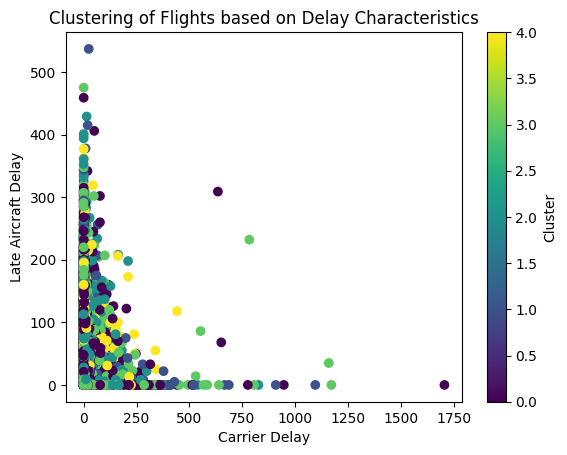

In [27]:
from sklearn.cluster import KMeans

# Input variables for cluster analysis
cluster_features = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Distance']

# Data extraction for cluster analysis
X_cluster = df[cluster_features]

# Initialize the k-means model
kmeans = KMeans(n_clusters=5, random_state=42)

# Fitting the model to the data
kmeans.fit(X_cluster)

# Cluster prediction for each flight
clusters = kmeans.predict(X_cluster)

# Adding a column with clusters to the dataframe
df['Cluster'] = clusters

# Display the number of flights in each cluster
print(df['Cluster'].value_counts())

# Display cluster centers
print(kmeans.cluster_centers_)

# Cluster visualization
plt.scatter(X_cluster['CarrierDelay'], X_cluster['LateAircraftDelay'], c=clusters, cmap='viridis')
plt.xlabel('Carrier Delay')
plt.ylabel('Late Aircraft Delay')
plt.title('Clustering of Flights based on Delay Characteristics')
plt.colorbar(label='Cluster')
plt.show()


These results represent the results of the cluster analysis, where the clusters are numbered from 0 to 4. Here's how we can interpret them:

Number of instances in each cluster:

- Cluster 0 has 11868 instances.
- Cluster 1 has 1425 instances.
- Cluster 2 has 5856 instances.
- Cluster 3 has 7948 instances.
- Cluster 4 has 2903 instances.

Cluster centroids:

Each row in the matrix represents the centroid of the cluster. For example, the first row represents the centroid of cluster 0, the second row the centroid of cluster 1, and so on.
Each column in a row represents attribute values ​​(eg CarrierDelay, WeatherDelay, etc.) for that centroid.
Interpretation of the centroid:

1. The first value in the row (1.61061678e+01, 2.79459649e+01, etc.) represents the average delay for the CarrierDelay attribute for that cluster.
2. The second value in the row (3.79819683e+00, 2.19017544e+00, etc.) represents the average delay for the WeatherDelay attribute for that cluster.
3. The third value in the row represents the average delay for the NASDelay attribute for that cluster, and so on for the other attributes.

For example, you can see that Cluster 1 has a relatively low value for WeatherDelay (about 2), while Cluster 4 has a higher value for this attribute (about 1.78). This may indicate differences between clusters in the impact of weather conditions on flight delays.